# Intermediary statistics 
In this section we will discuss how to do intermediary statstics using python.

#### Loading the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### Loading the dataset

In [2]:
data = pd.read_csv('./WineQT.csv')
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


#### Normal distribution

- We will plot the density plot for the numerical columns to check whether they belongs to the Normal distribution by checking the shape.

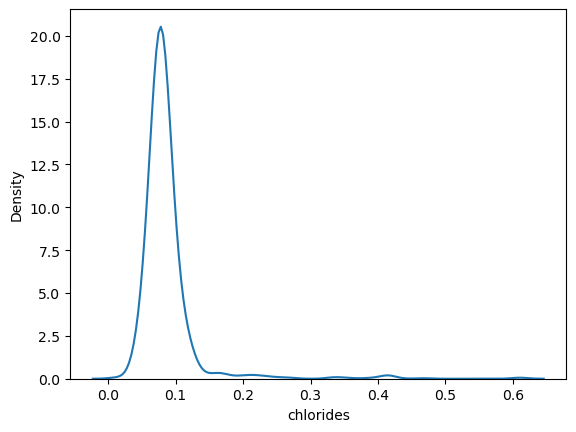

In [3]:
sns.kdeplot(data = data, 
           x = 'chlorides')
plt.show()

#### Empirical Rule check: 68 -95- 99 

##### Data points within 1 std

In [4]:
data.loc[ (data.chlorides <= data.chlorides.mean() + data.chlorides.std()) & 
            (data.chlorides >= data.chlorides.mean() - data.chlorides.std())].chlorides.count()/data.chlorides.count()

0.9518810148731408

##### Data points within 2 std

In [5]:
data.loc[ (data.chlorides <= data.chlorides.mean() + 2 * data.chlorides.std()) & 
            (data.chlorides >= data.chlorides.mean() - 2 * data.chlorides.std())].chlorides.count()/data.chlorides.count()

0.9728783902012248

##### Data points within 3 std

In [6]:
data.loc[ (data.chlorides <= data.chlorides.mean() + 3 * data.chlorides.std()) & 
            (data.chlorides >= data.chlorides.mean() - 3 * data.chlorides.std())].chlorides.count()/data.chlorides.count()

0.9816272965879265

#### Shapiro - Wilks Test for Normality

In [7]:
stat , p = st.shapiro(data.chlorides)

##### P value

In [8]:
p

1.0254506233493889e-49

#### Conclusion

In [9]:
if p > 0.05:
    print("Sample is Gaussian, Failed to reject H0")
else:
    print("Sample is Not Gaussian, Reject H0")

Sample is Not Gaussian, Reject H0


#### Standard Error

In [10]:
st.sem(data.alcohol)

0.03200977729618014

#### Confidence Interval of the Mean

##### CI of Citric Acid

- For finding the CI we need to calculate the SE of the variable first.

In [11]:
SE_Citric = st.sem(data['citric acid'])
SE_Citric

0.005817682379708292

In [12]:
st.norm.interval(confidence = 0.95,
                loc = data['citric acid'].mean(),
                scale = SE_Citric)

(0.25696150656796524, 0.27976640244340834)

- The above 2 values show the Lower and Upper CI's

#### Histograms

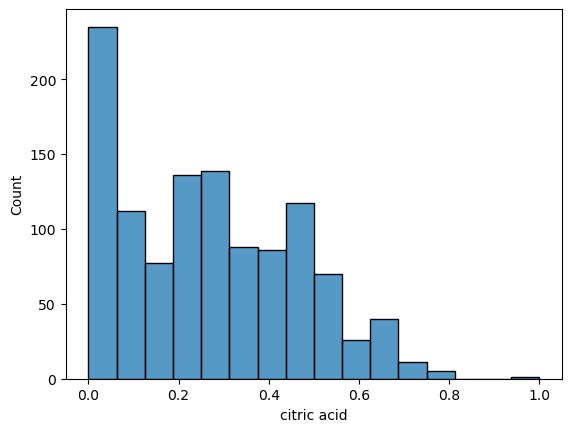

In [13]:
sns.histplot(data = data,
            x = 'citric acid')
plt.show()

### T-Test
- For this demo we need to load the "stack overflow" dataset
- We will only focus on two columns for the demo

In [14]:
data_ttest = pd.read_csv('./stackoverflow.csv')
data_ttest.head(10)

,OpenSource,Country,Student,Employment,Salary
0,No,Kenya,No,Employed part-time,NaN
1,Yes,United Kingdom,No,Employed full-time,51000.0
2,Yes,United States,No,Employed full-time,NaN
3,No,United States,No,Employed full-time,NaN
4,No,South Africa,"Yes, part-time",Employed full-time,260000.0
5,No,United Kingdom,No,Employed full-time,30000.0
6,Yes,United States,No,Employed full-time,120000.0
7,Yes,Nigeria,No,Employed full-time,NaN
8,Yes,United States,No,Employed full-time,250000.0
9,Yes,India,No,Employed full-time,NaN


In [15]:
data_ttest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenSource  98855 non-null  object 
 1   Country     98443 non-null  object 
 2   Student     94901 non-null  object 
 3   Employment  95321 non-null  object 
 4   Salary      50578 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.8+ MB


##### Droping the null values

In [16]:
data_ttest.dropna(inplace=True)
data_ttest.head()

,OpenSource,Country,Student,Employment,Salary
1,Yes,United Kingdom,No,Employed full-time,51000.0
4,No,South Africa,"Yes, part-time",Employed full-time,260000.0
5,No,United Kingdom,No,Employed full-time,30000.0
6,Yes,United States,No,Employed full-time,120000.0
8,Yes,United States,No,Employed full-time,250000.0


- We will compare the salaries of the people who work in UK with those who work in Germany

##### Creating the sub sets

In [17]:
salary_Germany = data_ttest.query( "Country == 'Germany'")
salary_Germany.head(10)

,OpenSource,Country,Student,Employment,Salary
53,Yes,Germany,No,Employed full-time,5000.0
63,Yes,Germany,No,Employed full-time,40000.0
105,No,Germany,No,Employed full-time,2400.0
160,Yes,Germany,"Yes, part-time",Employed part-time,4200.0
175,No,Germany,No,Employed full-time,40000.0
184,Yes,Germany,No,Employed full-time,2700.0
191,Yes,Germany,"Yes, full-time",Employed part-time,600.0
199,Yes,Germany,No,Employed full-time,100000.0
201,Yes,Germany,"Yes, full-time",Employed part-time,800.0
244,Yes,Germany,No,Employed full-time,48000.0


In [18]:
salary_UK = data_ttest.query( "Country == 'United Kingdom'")
salary_UK.head(10)

,OpenSource,Country,Student,Employment,Salary
1,Yes,United Kingdom,No,Employed full-time,51000.0
5,No,United Kingdom,No,Employed full-time,30000.0
22,No,United Kingdom,No,Employed full-time,25.0
79,Yes,United Kingdom,No,Employed full-time,32500.0
82,Yes,United Kingdom,No,Employed full-time,59500.0
103,Yes,United Kingdom,No,Employed full-time,51183.0
113,Yes,United Kingdom,No,Employed full-time,50000.0
114,Yes,United Kingdom,No,Employed full-time,46000.0
125,Yes,United Kingdom,No,Employed full-time,55000.0
171,No,United Kingdom,No,Employed full-time,33000.0


In [19]:
stat_ttest, p_ttest = st.ttest_ind(a = salary_Germany.Salary, b = salary_UK.Salary)
print(p_ttest)

0.3417927184785273


In [20]:
if p_ttest > 0.05:
    print("Both countries have similar salaries (Failed to reject H0)")
else:
    print("Both countries have different salaries (reject H0)")

Both countries have similar salaries (Failed to reject H0)


### Chi-square Test

- We are going to check whether there is a relation between people working on Open source and the their country.
- First of all we need to create cross tab using these catagorical columns

In [21]:
tab = pd.crosstab(data_ttest.Country, data_ttest.OpenSource)
tab

OpenSource,No,Yes
Country,,
Afghanistan,3,4
Albania,22,18
Algeria,22,10
Andorra,2,2
Angola,1,1
...,...,...
"Venezuela, Bolivarian Republic of...",41,19
Viet Nam,39,52
Yemen,4,2


In [22]:
stat_chi, p_chi, dof, exp_freq = st.chi2_contingency(tab)
print(p_chi)

5.291305308266461e-33


#### Conclusion

In [23]:
if p_chi > 0.05:
    print("There is no relationship (Failed to reject H0)")
else:
    print("There is strong relationship (Reject H0)")

There is strong relationship (Reject H0)
